Progetto laboratorio di programmazione. Gruppo: Nicolò Cioni, Rossano Gilioli e Salvatore Russo. Dataset scelto : dataset n 1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, tree
from sklearn.metrics import *
pd.set_option("display.max_rows", 70)
test= pd.read_csv("/content/sample_data/1.test_convertito_numerici.csv", sep=",")
test_non = pd.read_csv("/content/sample_data/1.test_non_convertito.csv", sep=",")
train_non = pd.read_csv("/content/sample_data/1.train_non_convertito.csv", sep=",")
train = pd.read_csv("/content/sample_data/1.train_convertito_numerici.csv", sep=",")

Quante righe e colonne sono presenti nei due dataset? I valori sono per lo più numerici o categorici e tra le righe sono poi presenti valori nulli?

In [ ]:
train.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,56707.000000,56707.000000,56707.000000,56707.0,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,...,56707.000000,56707.00000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000
mean,0.327420,0.358633,102.870369,2016.0,6.767313,28.458162,15.911104,0.893981,2.442802,1.850988,...,1.349075,0.22484,0.124429,71.445095,8.487435,3.833865,2.171302,98.325863,0.068334,0.548645
std,0.469276,0.479603,106.582358,0.0,3.194300,13.925493,8.784897,0.983110,1.863548,0.498133,...,1.887103,0.66649,0.337000,102.585427,47.550647,23.785668,0.477327,49.955696,0.253296,0.761173
min,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,17.000000,2016.0,4.000000,17.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.00000,0.000000,7.000000,-1.000000,0.000000,2.000000,68.530000,0.000000,0.000000
50%,0.000000,0.000000,68.000000,2016.0,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.00000,0.000000,9.000000,-1.000000,0.000000,2.000000,90.950000,0.000000,0.000000
75%,1.000000,1.000000,160.000000,2016.0,10.000000,41.000000,24.000000,2.000000,3.000000,2.000000,...,3.000000,0.00000,0.000000,134.000000,-1.000000,0.000000,2.000000,120.000000,0.000000,1.000000
max,1.000000,1.000000,709.000000,2016.0,12.000000,53.000000,31.000000,19.000000,50.000000,4.000000,...,11.000000,21.00000,2.000000,481.000000,499.000000,391.000000,3.000000,5400.000000,3.000000,5.000000


In [ ]:
test.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,40687.000000,40687.000000,40687.000000,40687.0,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,...,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000
mean,0.323912,0.386979,109.259223,2017.0,4.709784,18.630373,15.717576,0.973308,2.601543,1.877995,...,1.386168,0.239438,0.102736,83.233047,12.665544,0.235186,2.109961,114.637950,0.054981,0.676506
std,0.467973,0.487065,107.940953,0.0,2.160014,9.422475,8.789609,1.014337,1.973291,0.496172,...,1.907991,0.683429,0.305795,116.963712,65.972486,4.458834,0.454108,52.256304,0.235894,0.846531
min,0.000000,0.000000,0.000000,2017.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,0.000000,23.000000,2017.0,3.000000,11.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,2.000000,80.000000,0.000000,0.000000
50%,0.000000,0.000000,80.000000,2017.0,5.000000,19.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,2.000000,107.100000,0.000000,0.000000
75%,1.000000,1.000000,164.500000,2017.0,7.000000,26.000000,23.000000,2.000000,3.000000,2.000000,...,3.000000,0.000000,0.000000,229.000000,-1.000000,0.000000,2.000000,140.000000,0.000000,1.000000
max,1.000000,1.000000,629.000000,2017.0,8.000000,35.000000,31.000000,16.000000,40.000000,4.000000,...,11.000000,18.000000,2.000000,535.000000,543.000000,223.000000,3.000000,510.000000,8.000000,5.000000


In [ ]:
tot_train =  56707

In [ ]:
tot_test= 40687

Nel "Train dataset" sono presenti 56707 righe mentre nel "Test Dataset" 40687. Le colonne sono 30 per entrambi. I valori sono perlopiù categorici (18/30), infatti,  molti dei valori segnati come "int" in realtà sono la conversione in numero di "Si" e "No"(es: "is_canceled") . In entrambi i dateset non sono presenti valori nulli. La media delle cancellazioni è del 36% nel train dataset e del 39% nel secondo.

Come si distribuisce il valore relativo al numero di persone? Quante prenotazioni includono bambini e quanti ospiti sono, invece,  da soli?

In [ ]:
train["persone"] = train["babies"] + train["children"] + train["adults"]
print(train["persone"].mean())
test["persone"] = test["babies"] + test["children"] + test["adults"]
print(test["persone"].mean())

1.9633378595235156
2.0107405313736573


In [ ]:
train.groupby(train["babies"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone
babies,,,,,,,,,,,,,,,,,,,,,
0,56261,56261,56261,56261,56261,56261,56261,56261,56261,56261,...,56261,56261,56261,56261,56261,56261,56261,56261,56261,56261
1,437,437,437,437,437,437,437,437,437,437,...,437,437,437,437,437,437,437,437,437,437
2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
#unisco colonne children e babies
train["colonna_bambini"] = train["babies"] + train["children"]
train.groupby(train["colonna_bambini"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone
colonna_bambini,,,,,,,,,,,,,,,,,,,,,
0.0,52211,52211,52211,52211,52211,52211,52211,52211,52211,52211,...,52211,52211,52211,52211,52211,52211,52211,52211,52211,52211
1.0,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,...,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678
2.0,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,...,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768
3.0,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
10.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
test["colonna_bambini"] = test["babies"] + test["children"]
test.groupby(test["colonna_bambini"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone
colonna_bambini,,,,,,,,,,,,,,,,,,,,,
0.0,36941,36941,36941,36941,36941,36941,36941,36941,36941,36941,...,36941,36941,36941,36941,36941,36941,36941,36941,36941,36941
1.0,2136,2136,2136,2136,2136,2136,2136,2136,2136,2136,...,2136,2136,2136,2136,2136,2136,2136,2136,2136,2136
2.0,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,...,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565
3.0,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45


In [ ]:
#media cancellazioni in base al numero di bambini
train.groupby(train["colonna_bambini"])["is_canceled"].mean()

colonna_bambini
0.0     0.360020
1.0     0.305078
2.0     0.400452
3.0     0.306122
10.0    0.000000
Name: is_canceled, dtype: float64

In [ ]:
test.groupby(test["colonna_bambini"])["is_canceled"].mean()

colonna_bambini
0.0    0.385859
1.0    0.352060
2.0    0.466454
3.0    0.200000
Name: is_canceled, dtype: float64

In [ ]:
train[train["colonna_bambini"] > 9.00]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
18765,0,0,37,2016,1,3,12,0,2,2,...,0,9.0,-1.0,0,2,84.45,0,1,12.0,10.0


In [ ]:
train.groupby(train["persone"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,colonna_bambini
persone,,,,,,,,,,,,,,,,,,,,,
0.0,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
1.0,10967,10967,10967,10967,10967,10967,10967,10967,10967,10967,...,10967,10967,10967,10967,10967,10967,10967,10967,10967,10967
2.0,38563,38563,38563,38563,38563,38563,38563,38563,38563,38563,...,38563,38563,38563,38563,38563,38563,38563,38563,38563,38563
3.0,5189,5189,5189,5189,5189,5189,5189,5189,5189,5189,...,5189,5189,5189,5189,5189,5189,5189,5189,5189,5189
4.0,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852,...,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852
5.0,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
12.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
test.groupby(test["persone"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,colonna_bambini
persone,,,,,,,,,,,,,,,,,,,,,
0.0,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
1.0,7181,7181,7181,7181,7181,7181,7181,7181,7181,7181,...,7181,7181,7181,7181,7181,7181,7181,7181,7181,7181
2.0,27455,27455,27455,27455,27455,27455,27455,27455,27455,27455,...,27455,27455,27455,27455,27455,27455,27455,27455,27455,27455
3.0,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,...,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282
4.0,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,...,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636
5.0,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66


In [ ]:
train.groupby(train["persone"])["is_canceled"].mean()

persone
0.0     0.154762
1.0     0.301176
2.0     0.380468
3.0     0.305454
4.0     0.405508
5.0     0.254902
12.0    0.000000
Name: is_canceled, dtype: float64

In [ ]:
test.groupby(test["persone"])["is_canceled"].mean()

persone
0.0    0.164179
1.0    0.290071
2.0    0.409033
3.0    0.380897
4.0    0.473105
5.0    0.242424
Name: is_canceled, dtype: float64

La media del numero di persone è di circa 2 persone in entrambi i dataset.
Il numero di prenotazioni composte da un numero qualsiasi di adulti con almeno un bambino ("babies" e/o "children") è relativamente basso in entrambi i dataset: poco meno di 4500 per il train e 3700 per il test . Il numero massimo di bambini è di 10 raggiunto però in un singolo caso. Escludendo quello il massimo di bambini a seguito è di 3. La media delle cancellazioni scende per le prenotazioni con solamente un bambini e torna a salire per le prenotazioni con 2 bambini a seguito (le prenotazioni con 3 bambini sono così poche da non essere rilevanti). Escludendo suddetto caso estremo il numero massimo di persone per una singola camera è 5, l'aumentare del numero di persone non aumenta la media delle cancellazioni in modo lineare (prenotazioni da 3 componenti cancellano in media meno che prenotazioni da 2 e da 4). In entrambi i dataset poi sono presenti valori anomali corrispondenti a 0 persone per camera (84 nel train e 67 nel test).
Il numero di viaggiatori "solitari" è invece cospicuo e simile in entrambi i dataset.
Il numero di adulti per prenotazione varia da un minomo di 1 fino a un massimo di 4.



Come si distrubuisce il numero delle prenotazioni nei mesi dell'anno e la media delle cancellazioni?

In [ ]:
train.groupby(train["arrival_date_month"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
1,2248,2248,2248,2248,2248,2248,2248,2248,2248,2248,...,2248,2248,2248,2248,2248,2248,2248,2248,2248,2248
2,3891,3891,3891,3891,3891,3891,3891,3891,3891,3891,...,3891,3891,3891,3891,3891,3891,3891,3891,3891,3891
3,4824,4824,4824,4824,4824,4824,4824,4824,4824,4824,...,4824,4824,4824,4824,4824,4824,4824,4824,4824,4824
4,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428,...,5428,5428,5428,5428,5428,5428,5428,5428,5428,5428
5,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478,...,5478,5478,5478,5478,5478,5478,5478,5478,5478,5478
6,5292,5292,5292,5292,5292,5292,5292,5292,5292,5292,...,5292,5292,5292,5292,5292,5292,5292,5292,5292,5292
7,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572,...,4572,4572,4572,4572,4572,4572,4572,4572,4572,4572
8,5063,5063,5063,5063,5063,5063,5063,5063,5063,5063,...,5063,5063,5063,5063,5063,5063,5063,5063,5063,5063
9,5394,5394,5394,5394,5394,5394,5394,5394,5394,5394,...,5394,5394,5394,5394,5394,5394,5394,5394,5394,5394


In [ ]:
test.groupby(test["arrival_date_month"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
1,3681,3681,3681,3681,3681,3681,3681,3681,3681,3681,...,3681,3681,3681,3681,3681,3681,3681,3681,3681,3681
2,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,...,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177
3,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970,...,4970,4970,4970,4970,4970,4970,4970,4970,4970,4970
4,5661,5661,5661,5661,5661,5661,5661,5661,5661,5661,...,5661,5661,5661,5661,5661,5661,5661,5661,5661,5661
5,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,...,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313
6,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647,...,5647,5647,5647,5647,5647,5647,5647,5647,5647,5647
7,5313,5313,5313,5313,5313,5313,5313,5313,5313,5313,...,5313,5313,5313,5313,5313,5313,5313,5313,5313,5313
8,4925,4925,4925,4925,4925,4925,4925,4925,4925,4925,...,4925,4925,4925,4925,4925,4925,4925,4925,4925,4925


In [ ]:
train.groupby(train["arrival_date_month"])["persone"].mean()

arrival_date_month
1     1.705961
2     1.854279
3     1.919776
4     1.929071
5     1.902154
6     1.908730
7     2.209318
8     2.291132
9     1.972562
10    1.928099
11    1.797261
12    2.001554
Name: persone, dtype: float64

In [ ]:
test.groupby(test["arrival_date_month"])["persone"].mean()

arrival_date_month
1    1.817169
2    1.935360
3    1.845272
4    2.036566
5    1.906542
6    2.015229
7    2.219273
8    2.260102
Name: persone, dtype: float64

In [ ]:
#media cancellazioni in base al mese di arrivo
train.groupby(train["arrival_date_month"])["is_canceled"].mean()

arrival_date_month
1     0.247776
2     0.343613
3     0.306177
4     0.379698
5     0.349580
6     0.396070
7     0.327865
8     0.360458
9     0.374861
10    0.405288
11    0.367310
12    0.362176
Name: is_canceled, dtype: float64

In [ ]:
test.groupby(test["arrival_date_month"])["is_canceled"].mean()

arrival_date_month
1    0.339582
2    0.325353
3    0.336419
4    0.435082
5    0.437510
6    0.431911
7    0.373424
8    0.368731
Name: is_canceled, dtype: float64

I due dataset differiscono per il numero di mesi tenuti in considerazione: il testdataset, infatti, prende in considerazione soltanto i mesi da gennaio a agosto.
Il mese che ha riscontrato più prenotazioni nel traindataset è quello di ottobre, tuttavia le prenotazioni sembrano abbastanza equamente suddivise, fatta eccezione per gennaio dove si è riscontrato un valore notevolmente più basso in entrambi i dataset (anche se più marcato nel train). Nel test dataset si ha poi un aumento non trascurabile di prenotazioni nel meese di maggio, non presente invece nel train.
La media realtiva al numero di persone in ognuno dei mesi dell'anno è in linea con quella generale dei due dataset.
Quella delle cancellazioni invece risulta più altalentante con valori che si distanziano notevolmente dalla media generale (es: gennaio, nel train dataset, si distanzia di 11 punti percentuali).

Come si sono divisi i casi in base al segmento di mercaro? Come cambia la media relativa al numero di cancellazioni?

In [ ]:
train_non.groupby(train_non["market_segment"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
market_segment,,,,,,,,,,,,,,,,,,,,,
Aviation,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
Complementary,364,364,364,364,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
Corporate,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,...,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562
Direct,5663,5663,5663,5663,5663,5663,5663,5663,5663,5663,...,5663,5663,5663,5663,5663,5663,5663,5663,5663,5663
Groups,7857,7857,7857,7857,7857,7857,7857,7857,7857,7857,...,7857,7857,7857,7857,7857,7857,7857,7857,7857,7857
Offline TA/TO,12473,12473,12473,12473,12473,12473,12473,12473,12473,12473,...,12473,12473,12473,12473,12473,12473,12473,12473,12473,12473
Online TA,27661,27661,27661,27661,27661,27661,27661,27661,27661,27661,...,27661,27661,27661,27661,27661,27661,27661,27661,27661,27661


In [ ]:
test_non.groupby(test_non["market_segment"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
market_segment,,,,,,,,,,,,,,,,,,,,,
Aviation,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
Complementary,214,214,214,214,214,214,214,214,214,214,...,214,214,214,214,214,214,214,214,214,214
Corporate,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562,...,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562
Direct,4629,4629,4629,4629,4629,4629,4629,4629,4629,4629,...,4629,4629,4629,4629,4629,4629,4629,4629,4629,4629
Groups,5854,5854,5854,5854,5854,5854,5854,5854,5854,5854,...,5854,5854,5854,5854,5854,5854,5854,5854,5854,5854
Offline TA/TO,5667,5667,5667,5667,5667,5667,5667,5667,5667,5667,...,5667,5667,5667,5667,5667,5667,5667,5667,5667,5667
Online TA,22651,22651,22651,22651,22651,22651,22651,22651,22651,22651,...,22651,22651,22651,22651,22651,22651,22651,22651,22651,22651


In [ ]:
test_non.groupby(test_non["market_segment"])["is_canceled"].mean()

market_segment
Aviation         0.209091
Complementary    0.163551
Corporate        0.254802
Direct           0.154677
Groups           0.581141
Offline TA/TO    0.337745
Online TA        0.408680
Name: is_canceled, dtype: float64

In [ ]:
train_non.groupby(train_non["market_segment"])["is_canceled"].mean()

market_segment
Aviation         0.228346
Complementary    0.129121
Corporate        0.146370
Direct           0.153099
Groups           0.617539
Offline TA/TO    0.347150
Online TA        0.355627
Name: is_canceled, dtype: float64

I valori relativi ai canali di distribuzione scelti dai visitatori sembrano più o meno simili nei due dataset fatta eccezione per il dato inerente alle prenotazioni avvenute offline tramite TA/TO (decisamente più alto nel traindataset).
"Aviation" e "complementary" hanno un numero di casi estremamente più basso mentre le prenotazioni presso agenzie online rappresentano circa la metà dei casi in entrambi i datset.
La media delle cancellazioni è quasi raddoppiata per quanto riguarda i gruppi mentre è dimezzata per chi prenota direttamente.

Come si distribuisce il valore delle prenotazioni precedenti (cancellate e non) e come aver già prenotato presso l'hotel cambia la media delle cancellazioni? C'è differenza tra avere già avuto una prenotazione non cancellata e una cancellazione?

In [ ]:
train.groupby(train["previous_cancellations"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,54936,54936,54936,54936,54936,54936,54936,54936,54936,54936,...,54936,54936,54936,54936,54936,54936,54936,54936,54936,54936
1,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,...,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595
2,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
3,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
4,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
5,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
6,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
11,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
13,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [ ]:
test.groupby(test["previous_cancellations"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,40409,40409,40409,40409,40409,40409,40409,40409,40409,40409,...,40409,40409,40409,40409,40409,40409,40409,40409,40409,40409
1,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
2,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
3,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
5,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
6,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


In [ ]:
train.groupby(train["previous_bookings_not_canceled"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
previous_bookings_not_canceled,,,,,,,,,,,,,,,,,,,,,
0,54827,54827,54827,54827,54827,54827,54827,54827,54827,54827,...,54827,54827,54827,54827,54827,54827,54827,54827,54827,54827
1,777,777,777,777,777,777,777,777,777,777,...,777,777,777,777,777,777,777,777,777,777
2,289,289,289,289,289,289,289,289,289,289,...,289,289,289,289,289,289,289,289,289,289
3,183,183,183,183,183,183,183,183,183,183,...,183,183,183,183,183,183,183,183,183,183
4,138,138,138,138,138,138,138,138,138,138,...,138,138,138,138,138,138,138,138,138,138
5,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
6,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
7,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
8,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36


In [ ]:
test.groupby(test["previous_bookings_not_canceled"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
previous_bookings_not_canceled,,,,,,,,,,,,,,,,,,,,,
0,39259,39259,39259,39259,39259,39259,39259,39259,39259,39259,...,39259,39259,39259,39259,39259,39259,39259,39259,39259,39259
1,590,590,590,590,590,590,590,590,590,590,...,590,590,590,590,590,590,590,590,590,590
2,231,231,231,231,231,231,231,231,231,231,...,231,231,231,231,231,231,231,231,231,231
3,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
4,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
5,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
6,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
7,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
8,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [ ]:
train["prenotazioni_precedenti"] = train["previous_bookings_not_canceled"] + train["previous_cancellations"]
train.groupby(train["prenotazioni_precedenti"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini
prenotazioni_precedenti,,,,,,,,,,,,,,,,,,,,,
0,53380,53380,53380,53380,53380,53380,53380,53380,53380,53380,...,53380,53380,53380,53380,53380,53380,53380,53380,53380,53380
1,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,...,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162
2,302,302,302,302,302,302,302,302,302,302,...,302,302,302,302,302,302,302,302,302,302
3,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179
4,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
5,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
6,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
7,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
8,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43


In [ ]:
test["prenotazioni_precedenti"] = test["previous_bookings_not_canceled"] + test["previous_cancellations"]
test.groupby(train["prenotazioni_precedenti"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
prenotazioni_precedenti,,,,,,,,,,,,,,,,,,,,,
0,37613,37613,37613,37613,37613,37613,37613,37613,37613,37613,...,37613,37613,37613,37613,37613,37613,37613,37613,37613,37613
1,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,...,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
2,271,271,271,271,271,271,271,271,271,271,...,271,271,271,271,271,271,271,271,271,271
3,161,161,161,161,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161
4,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
5,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
6,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
7,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
8,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37


In [ ]:
train.groupby(train["previous_bookings_not_canceled"])["is_canceled"].mean()

previous_bookings_not_canceled
0     0.368924
1     0.055341
2     0.038062
3     0.043716
4     0.072464
5     0.081818
6     0.048387
7     0.023256
8     0.055556
9     0.000000
10    0.136364
11    0.111111
12    0.200000
13    0.000000
14    0.000000
15    0.181818
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.727273
26    0.000000
27    0.250000
28    0.000000
29    0.333333
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.500000
45    0.000000
46    0.000000
47    0.000000
48    0.500000
49    0.000000
50    0.000000
51    0.000000
52    0.000000
53    0.000000
54    0.000000
55    0.000000
56    0.000000
57    0.000000
58    1.000000
Name: is_canceled, dtype: float64

In [ ]:
test.groupby(test["previous_bookings_not_canceled"])["is_canceled"].mean()

previous_bookings_not_canceled
0     0.399272
1     0.049153
2     0.060606
3     0.040984
4     0.025000
5     0.016667
6     0.000000
7     0.076923
8     0.033333
9     0.000000
10    0.137931
11    0.130435
12    0.000000
13    0.105263
14    0.125000
15    0.000000
16    0.100000
17    0.142857
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.200000
27    0.200000
28    0.000000
29    0.000000
30    0.000000
58    0.000000
59    0.000000
60    0.000000
61    0.000000
62    0.000000
63    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
Name: is_canceled, dtype: float64

In [ ]:
train.groupby(train["previous_cancellations"])["is_canceled"].mean()

previous_cancellations
0     0.342799
1     0.909718
2     0.312500
3     0.196078
4     0.083333
5     0.153846
6     1.000000
11    0.242424
13    0.916667
Name: is_canceled, dtype: float64

In [ ]:
test.groupby(test["previous_cancellations"])["is_canceled"].mean()

previous_cancellations
0    0.388453
1    0.174359
2    0.162162
3    0.333333
4    0.315789
5    0.000000
6    0.000000
Name: is_canceled, dtype: float64

In [ ]:
train.groupby(train["prenotazioni_precedenti"])["is_canceled"].mean()

prenotazioni_precedenti
0     0.352154
1     0.663275
2     0.076159
3     0.039106
4     0.056000
5     0.078431
6     0.220779
7     0.094340
8     0.046512
9     0.033333
10    0.086957
11    0.050000
12    0.222222
13    0.000000
14    0.545455
15    0.125000
16    0.000000
17    0.000000
18    0.111111
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.333333
30    0.250000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.888889
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.000000
45    0.000000
46    0.000000
47    1.000000
48    0.000000
49    0.000000
50    0.000000
51    0.000000
53    0.500000
54    0.000000
55    0.000000
56    0.000000
57    0.000000
58    0.000000
59    0.000000
60    0.000000
61    0.000000
62    0.000000
64    1.000000
Name: is_canceled, dtype: float

In [ ]:
test.groupby(test["prenotazioni_precedenti"])["is_canceled"].mean()

prenotazioni_precedenti
0     0.399256
1     0.024561
2     0.093220
3     0.073770
4     0.067416
5     0.051724
6     0.000000
7     0.032258
8     0.031250
9     0.032258
10    0.076923
11    0.130435
12    0.000000
13    0.000000
14    0.055556
15    0.200000
16    0.214286
17    0.100000
18    0.000000
19    0.000000
20    0.000000
21    0.333333
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.200000
28    0.000000
29    0.000000
30    0.333333
31    0.000000
32    0.000000
33    0.000000
34    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
73    0.000000
74    0.000000
75    0.000000
76    0.000000
77    0.000000
78    0.000000
Name: is_canceled, dtype: float64

Il numero di persone che hanno almeno una prenotazione non cancellata presso l'hotel è abbastanza omogeneo nei due dataset. Anche quello inerente al numero di cancellazioni è equilibrato fatta eccezione per quello relativo alle persone con una cancellazione precedente che riscontra un valore anomalo, in quanto nel train è superiore di 10 volte rispetto al test, in più la media di cancellazioni, nel train, di chi aveva già una cancellazione precedente risulta estremamente alta (90% circa). In generale avere già una prenotazione precedente diminuisce di molto la media delle cancellazioni, questo è più evidente per chi aveva una prenotazione non cancellata.

Controllare la distribuzione in base al tipo di hotel selezionato

Controllare la distribuzione in base ai giorni in attesa

In [ ]:
train.groupby(train["days_in_waiting_list"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
days_in_waiting_list,,,,,,,,,,,,,,,,,,,,,
0,53958,53958,53958,53958,53958,53958,53958,53958,53958,53958,...,53958,53958,53958,53958,53958,53958,53958,53958,53958,53958
1,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
4,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
259,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
330,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


In [ ]:
waiting_people = tot_train - 53958
print(waiting_people)

2749


In [ ]:
test.groupby(test["days_in_waiting_list"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
days_in_waiting_list,,,,,,,,,,,,,,,,,,,,,
0,40487,40487,40487,40487,40487,40487,40487,40487,40487,40487,...,40487,40487,40487,40487,40487,40487,40487,40487,40487,40487
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
175,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
183,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
waiting_people_test = tot_test - 40487
print(waiting_people_test)

200


I due dataset differiscono molto nei valori relativi alle persone che sono rimaste in lista d'attesa, difatti, nel train dataset abbiamo 2750 persone con valori che vanno da 0 a 391 giorni in lista d'attesa, nel secondo, invece, i casi scendono a 200 con valori da 0 a 223.

Controllare i valori in base al tipo di stanza prenotata e il tipo di stanza assegnata e come influisce il cambio nelle cancellazioni.

controllare la distribuzione in base al "customer Type". (fino a qui Salvo)

Controllare la distribuzione dei dati in base alla durata del soggiorno (fare una colonna "days" (weekend + week))

In [ ]:
train.groupby(train["stays_in_weekend_nights"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,25340,25340,25340,25340,25340,25340,25340,25340,25340,25340,...,25340,25340,25340,25340,25340,25340,25340,25340,25340,25340
1,14987,14987,14987,14987,14987,14987,14987,14987,14987,14987,...,14987,14987,14987,14987,14987,14987,14987,14987,14987,14987
2,14807,14807,14807,14807,14807,14807,14807,14807,14807,14807,...,14807,14807,14807,14807,14807,14807,14807,14807,14807,14807
3,602,602,602,602,602,602,602,602,602,602,...,602,602,602,602,602,602,602,602,602,602
4,818,818,818,818,818,818,818,818,818,818,...,818,818,818,818,818,818,818,818,818,818
5,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
6,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
8,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29


In [ ]:
test.groupby(test["stays_in_weekend_nights"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,16885,16885,16885,16885,16885,16885,16885,16885,16885,16885,...,16885,16885,16885,16885,16885,16885,16885,16885,16885,16885
1,10433,10433,10433,10433,10433,10433,10433,10433,10433,10433,...,10433,10433,10433,10433,10433,10433,10433,10433,10433,10433
2,12138,12138,12138,12138,12138,12138,12138,12138,12138,12138,...,12138,12138,12138,12138,12138,12138,12138,12138,12138,12138
3,408,408,408,408,408,408,408,408,408,408,...,408,408,408,408,408,408,408,408,408,408
4,689,689,689,689,689,689,689,689,689,689,...,689,689,689,689,689,689,689,689,689,689
5,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
6,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
7,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23


In [ ]:
train.groupby(train["stays_in_week_nights"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
stays_in_week_nights,,,,,,,,,,,,,,,,,,,,,
0,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978,...,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978
1,14464,14464,14464,14464,14464,14464,14464,14464,14464,14464,...,14464,14464,14464,14464,14464,14464,14464,14464,14464,14464
2,16209,16209,16209,16209,16209,16209,16209,16209,16209,16209,...,16209,16209,16209,16209,16209,16209,16209,16209,16209,16209
3,10651,10651,10651,10651,10651,10651,10651,10651,10651,10651,...,10651,10651,10651,10651,10651,10651,10651,10651,10651,10651
4,4376,4376,4376,4376,4376,4376,4376,4376,4376,4376,...,4376,4376,4376,4376,4376,4376,4376,4376,4376,4376
5,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,...,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901
6,640,640,640,640,640,640,640,640,640,640,...,640,640,640,640,640,640,640,640,640,640
7,455,455,455,455,455,455,455,455,455,455,...,455,455,455,455,455,455,455,455,455,455
8,289,289,289,289,289,289,289,289,289,289,...,289,289,289,289,289,289,289,289,289,289


In [ ]:
test.groupby(test["stays_in_week_nights"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
stays_in_week_nights,,,,,,,,,,,,,,,,,,,,,
0,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452,...,2452,2452,2452,2452,2452,2452,2452,2452,2452,2452
1,9864,9864,9864,9864,9864,9864,9864,9864,9864,9864,...,9864,9864,9864,9864,9864,9864,9864,9864,9864,9864
2,10535,10535,10535,10535,10535,10535,10535,10535,10535,10535,...,10535,10535,10535,10535,10535,10535,10535,10535,10535,10535
3,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349,...,8349,8349,8349,8349,8349,8349,8349,8349,8349,8349
4,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587,...,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587
5,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187,...,4187,4187,4187,4187,4187,4187,4187,4187,4187,4187
6,515,515,515,515,515,515,515,515,515,515,...,515,515,515,515,515,515,515,515,515,515
7,362,362,362,362,362,362,362,362,362,362,...,362,362,362,362,362,362,362,362,362,362
8,236,236,236,236,236,236,236,236,236,236,...,236,236,236,236,236,236,236,236,236,236


In [ ]:
train.groupby(train["stays_in_weekend_nights"]).mean()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,0.270718,0.367601,99.176322,2016.0,6.598619,27.642186,15.814009,2.063339,1.786859,0.089503,...,60.832163,11.419495,5.361918,2.217561,95.570026,0.072889,0.482202,1.883110,0.096251,0.267798
1,0.298525,0.349369,100.375726,2016.0,6.903316,29.150264,16.049643,1.925335,1.874425,0.098819,...,65.815507,10.964569,3.687529,2.202509,100.864818,0.069193,0.551011,1.980450,0.106025,0.209048
2,0.408793,0.354157,106.554197,2016.0,6.897346,29.066995,16.028432,2.965489,1.933950,0.133653,...,89.495644,1.488350,1.757007,2.099480,100.556028,0.061457,0.650233,2.078814,0.144864,0.079962
3,0.735880,0.338870,159.828904,2016.0,7.156146,30.375415,16.219269,6.473422,1.908638,0.124585,...,117.732558,3.089701,0.255814,2.051495,104.144352,0.066445,0.646179,2.049834,0.141196,0.126246
4,0.811736,0.300733,155.704156,2016.0,7.074572,29.639364,14.705379,8.678484,1.905868,0.111247,...,140.744499,1.289731,0.123472,1.588020,96.076394,0.045232,0.669927,2.024450,0.118582,0.046455
5,0.295455,0.500000,74.704545,2016.0,6.750000,28.113636,12.340909,11.159091,1.545455,0.090909,...,58.500000,37.500000,0.000000,2.000000,89.251818,0.045455,0.613636,1.681818,0.136364,0.045455
6,0.559322,0.711864,108.355932,2016.0,5.406780,21.711864,10.593220,14.661017,1.694915,0.067797,...,97.694915,5.966102,0.000000,1.983051,83.187966,0.033898,0.322034,1.762712,0.067797,0.033898
7,0.285714,1.000000,68.000000,2016.0,3.285714,13.000000,12.714286,18.714286,1.857143,0.000000,...,6.142857,-1.000000,0.000000,2.285714,73.262857,0.000000,0.428571,1.857143,0.000000,0.000000
8,0.586207,0.517241,113.862069,2016.0,4.862069,19.862069,14.137931,20.344828,1.724138,0.206897,...,117.965517,-1.000000,0.000000,1.931034,73.472069,0.000000,0.379310,1.931034,0.206897,0.068966


In [ ]:
media_weekend = train.groupby(train["stays_in_weekend_nights"]).mean()
print(media_weekend)

                            hotel  is_canceled   lead_time  arrival_date_year  \
stays_in_weekend_nights                                                         
0                        0.270718     0.367601   99.176322             2016.0   
1                        0.298525     0.349369  100.375726             2016.0   
2                        0.408793     0.354157  106.554197             2016.0   
3                        0.735880     0.338870  159.828904             2016.0   
4                        0.811736     0.300733  155.704156             2016.0   
5                        0.295455     0.500000   74.704545             2016.0   
6                        0.559322     0.711864  108.355932             2016.0   
7                        0.285714     1.000000   68.000000             2016.0   
8                        0.586207     0.517241  113.862069             2016.0   
9                        0.500000     0.833333   26.333333             2016.0   
10                       1.0

In [ ]:
media_week = train.groupby(train["stays_in_week_nights"]).mean()
print(media_week)

                         hotel  is_canceled   lead_time  arrival_date_year  \
stays_in_week_nights                                                         
0                     0.343640     0.257164   49.421317             2016.0   
1                     0.313952     0.283186   61.910537             2016.0   
2                     0.220001     0.448763  130.817632             2016.0   
3                     0.263074     0.371796  108.821613             2016.0   
4                     0.330439     0.361517  114.688071             2016.0   
5                     0.667619     0.338298  132.804734             2016.0   
6                     0.703125     0.382812  138.446875             2016.0   
7                     0.784615     0.305495  151.274725             2016.0   
8                     0.747405     0.311419  152.031142             2016.0   
9                     0.597938     0.422680  126.876289             2016.0   
10                    0.837782     0.264887  161.868583         

Controllare la distribuzione di dati in base al tipo di prenotazione e pasti prenotati (b&b etc.)

In [ ]:
train.groupby(train["reserved_room_type"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
reserved_room_type,,,,,,,,,,,,,,,,,,,,,
0,40718,40718,40718,40718,40718,40718,40718,40718,40718,40718,...,40718,40718,40718,40718,40718,40718,40718,40718,40718,40718
1,672,672,672,672,672,672,672,672,672,672,...,672,672,672,672,672,672,672,672,672,672
2,282,282,282,282,282,282,282,282,282,282,...,282,282,282,282,282,282,282,282,282,282
3,9421,9421,9421,9421,9421,9421,9421,9421,9421,9421,...,9421,9421,9421,9421,9421,9421,9421,9421,9421,9421
4,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881,...,2881,2881,2881,2881,2881,2881,2881,2881,2881,2881
5,1424,1424,1424,1424,1424,1424,1424,1424,1424,1424,...,1424,1424,1424,1424,1424,1424,1424,1424,1424,1424
6,997,997,997,997,997,997,997,997,997,997,...,997,997,997,997,997,997,997,997,997,997
7,306,306,306,306,306,306,306,306,306,306,...,306,306,306,306,306,306,306,306,306,306
9,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [ ]:
test.groupby(test["reserved_room_type"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
reserved_room_type,,,,,,,,,,,,,,,,,,,,,
0,27556,27556,27556,27556,27556,27556,27556,27556,27556,27556,...,27556,27556,27556,27556,27556,27556,27556,27556,27556,27556
1,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202
2,479,479,479,479,479,479,479,479,479,479,...,479,479,479,479,479,479,479,479,479,479
3,7594,7594,7594,7594,7594,7594,7594,7594,7594,7594,...,7594,7594,7594,7594,7594,7594,7594,7594,7594,7594
4,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,...,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701
5,1099,1099,1099,1099,1099,1099,1099,1099,1099,1099,...,1099,1099,1099,1099,1099,1099,1099,1099,1099,1099
6,837,837,837,837,837,837,837,837,837,837,...,837,837,837,837,837,837,837,837,837,837
7,213,213,213,213,213,213,213,213,213,213,...,213,213,213,213,213,213,213,213,213,213
9,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [ ]:
train.groupby(train["assigned_room_type"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
assigned_room_type,,,,,,,,,,,,,,,,,,,,,
0,34690,34690,34690,34690,34690,34690,34690,34690,34690,34690,...,34690,34690,34690,34690,34690,34690,34690,34690,34690,34690
1,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,...,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346
2,984,984,984,984,984,984,984,984,984,984,...,984,984,984,984,984,984,984,984,984,984
3,12403,12403,12403,12403,12403,12403,12403,12403,12403,12403,...,12403,12403,12403,12403,12403,12403,12403,12403,12403,12403
4,3574,3574,3574,3574,3574,3574,3574,3574,3574,3574,...,3574,3574,3574,3574,3574,3574,3574,3574,3574,3574
5,1799,1799,1799,1799,1799,1799,1799,1799,1799,1799,...,1799,1799,1799,1799,1799,1799,1799,1799,1799,1799
6,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,...,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210
7,339,339,339,339,339,339,339,339,339,339,...,339,339,339,339,339,339,339,339,339,339
8,215,215,215,215,215,215,215,215,215,215,...,215,215,215,215,215,215,215,215,215,215


In [ ]:
test.groupby(test["assigned_room_type"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
assigned_room_type,,,,,,,,,,,,,,,,,,,,,
0,24922,24922,24922,24922,24922,24922,24922,24922,24922,24922,...,24922,24922,24922,24922,24922,24922,24922,24922,24922,24922
1,304,304,304,304,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304
2,913,913,913,913,913,913,913,913,913,913,...,913,913,913,913,913,913,913,913,913,913
3,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,...,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903
4,2900,2900,2900,2900,2900,2900,2900,2900,2900,2900,...,2900,2900,2900,2900,2900,2900,2900,2900,2900,2900
5,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320,...,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320
6,960,960,960,960,960,960,960,960,960,960,...,960,960,960,960,960,960,960,960,960,960
7,247,247,247,247,247,247,247,247,247,247,...,247,247,247,247,247,247,247,247,247,247
8,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103


In [ ]:
media_reserved = train.groupby(train["reserved_room_type"]).count()
print(media_reserved)

                    hotel  is_canceled  lead_time  arrival_date_year  \
reserved_room_type                                                     
0                   40718        40718      40718              40718   
1                     672          672        672                672   
2                     282          282        282                282   
3                    9421         9421       9421               9421   
4                    2881         2881       2881               2881   
5                    1424         1424       1424               1424   
6                     997          997        997                997   
7                     306          306        306                306   
9                       6            6          6                  6   

                    arrival_date_month  arrival_date_week_number  \
reserved_room_type                                                 
0                                40718                     40718   
1  

In [ ]:
media_assigned = train.groupby(train["assigned_room_type"]).count()
print(media_assigned)

                    hotel  is_canceled  lead_time  arrival_date_year  \
assigned_room_type                                                     
0                   34690        34690      34690              34690   
1                    1346         1346       1346               1346   
2                     984          984        984                984   
3                   12403        12403      12403              12403   
4                    3574         3574       3574               3574   
5                    1799         1799       1799               1799   
6                    1210         1210       1210               1210   
7                     339          339        339                339   
8                     215          215        215                215   
9                     141          141        141                141   
11                      6            6          6                  6   

                    arrival_date_month  arrival_date_week_numbe

In [ ]:
train.groupby(train["meal"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti,tipo_stanza
meal,,,,,,,,,,,,,,,,,,,,,
0,44551,44551,44551,44551,44551,44551,44551,44551,44551,44551,...,44551,44551,44551,44551,44551,44551,44551,44551,44551,44551
1,334,334,334,334,334,334,334,334,334,334,...,334,334,334,334,334,334,334,334,334,334
2,6176,6176,6176,6176,6176,6176,6176,6176,6176,6176,...,6176,6176,6176,6176,6176,6176,6176,6176,6176,6176
3,5060,5060,5060,5060,5060,5060,5060,5060,5060,5060,...,5060,5060,5060,5060,5060,5060,5060,5060,5060,5060
4,586,586,586,586,586,586,586,586,586,586,...,586,586,586,586,586,586,586,586,586,586


In [ ]:
test.groupby(test["meal"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti,tipo_stanza
meal,,,,,,,,,,,,,,,,,,,,,
0,30524,30524,30524,30524,30524,30524,30524,30524,30524,30524,...,30524,30524,30524,30524,30524,30524,30524,30524,30524,30524
1,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
2,4477,4477,4477,4477,4477,4477,4477,4477,4477,4477,...,4477,4477,4477,4477,4477,4477,4477,4477,4477,4477
3,5178,5178,5178,5178,5178,5178,5178,5178,5178,5178,...,5178,5178,5178,5178,5178,5178,5178,5178,5178,5178
4,413,413,413,413,413,413,413,413,413,413,...,413,413,413,413,413,413,413,413,413,413


In [ ]:
media_pasti = train.groupby(train["meal"]).count()
print(media_pasti)

      hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
meal                                                                         
0     44551        44551      44551              44551               44551   
1       334          334        334                334                 334   
2      6176         6176       6176               6176                6176   
3      5060         5060       5060               5060                5060   
4       586          586        586                586                 586   

      arrival_date_week_number  arrival_date_day_of_month  \
meal                                                        
0                        44551                      44551   
1                          334                        334   
2                         6176                       6176   
3                         5060                       5060   
4                          586                        586   

      stays_in_weekend_ni

In [ ]:
train["tipo_stanza"] = train["reserved_room_type"] + train["assigned_room_type"]
train.groupby(train["tipo_stanza"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
tipo_stanza,,,,,,,,,,,,,,,,,,,,,
0,34432,34432,34432,34432,34432,34432,34432,34432,34432,34432,...,34432,34432,34432,34432,34432,34432,34432,34432,34432,34432
1,728,728,728,728,728,728,728,728,728,728,...,728,728,728,728,728,728,728,728,728,728
2,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,...,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
3,4012,4012,4012,4012,4012,4012,4012,4012,4012,4012,...,4012,4012,4012,4012,4012,4012,4012,4012,4012,4012
4,840,840,840,840,840,840,840,840,840,840,...,840,840,840,840,840,840,840,840,840,840
5,231,231,231,231,231,231,231,231,231,231,...,231,231,231,231,231,231,231,231,231,231
6,8675,8675,8675,8675,8675,8675,8675,8675,8675,8675,...,8675,8675,8675,8675,8675,8675,8675,8675,8675,8675
7,464,464,464,464,464,464,464,464,464,464,...,464,464,464,464,464,464,464,464,464,464
8,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804,...,2804,2804,2804,2804,2804,2804,2804,2804,2804,2804


In [ ]:
test["tipo_stanza"] = test["reserved_room_type"] + test["assigned_room_type"]
test.groupby(test["tipo_stanza"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti
tipo_stanza,,,,,,,,,,,,,,,,,,,,,
0,24776,24776,24776,24776,24776,24776,24776,24776,24776,24776,...,24776,24776,24776,24776,24776,24776,24776,24776,24776,24776
1,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237
2,569,569,569,569,569,569,569,569,569,569,...,569,569,569,569,569,569,569,569,569,569
3,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,...,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703
4,721,721,721,721,721,721,721,721,721,721,...,721,721,721,721,721,721,721,721,721,721
5,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
6,7314,7314,7314,7314,7314,7314,7314,7314,7314,7314,...,7314,7314,7314,7314,7314,7314,7314,7314,7314,7314
7,166,166,166,166,166,166,166,166,166,166,...,166,166,166,166,166,166,166,166,166,166
8,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640,...,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640


In [ ]:
media_stanza = train.groupby(train["tipo_stanza"]).count()
print(media_stanza)

             hotel  is_canceled  lead_time  arrival_date_year  \
tipo_stanza                                                     
0            34432        34432      34432              34432   
1              728          728        728                728   
2             1319         1319       1319               1319   
3             4012         4012       4012               4012   
4              840          840        840                840   
5              231          231        231                231   
6             8675         8675       8675               8675   
7              464          464        464                464   
8             2804         2804       2804               2804   
9              359          359        359                359   
10            1376         1376       1376               1376   
11             117          117        117                117   
12            1014         1014       1014               1014   
13              15       

Si segnala un valore alquanto elevato, rispetto al resto dei casi, nell'assegnazione di tipo "0". Questo vale sia nel caso relativo alla tipologia di stanza, sia nel caso dei pasti (dove la tipologia "0" si riferisce al caso di B&B). Sempre per il caso pasti, notiamo una notevole riduzione delle cancellazioni nei casi di "FB" (full board: pensione completa). Nel caso "room type" vediamo un valore molto basso (6 unità) nell'ultima tipologia di stanza, della quale però possiamo solo ipotizzare la reale tipologia.

Controllare il numero di cancellazioni in base al deposito fatto oppure no (deposit_type)

In [ ]:
train.groupby(train["deposit_type"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti,tipo_stanza
deposit_type,,,,,,,,,,,,,,,,,,,,,
0,49782,49782,49782,49782,49782,49782,49782,49782,49782,49782,...,49782,49782,49782,49782,49782,49782,49782,49782,49782,49782
1,6794,6794,6794,6794,6794,6794,6794,6794,6794,6794,...,6794,6794,6794,6794,6794,6794,6794,6794,6794,6794
2,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131


In [ ]:
test.groupby(test["deposit_type"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti,tipo_stanza
deposit_type,,,,,,,,,,,,,,,,,,,,,
0,36534,36534,36534,36534,36534,36534,36534,36534,36534,36534,...,36534,36534,36534,36534,36534,36534,36534,36534,36534,36534
1,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126,...,4126,4126,4126,4126,4126,4126,4126,4126,4126,4126
2,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


In [ ]:
media_deposito = train.groupby(train["deposit_type"]).count()
print(media_deposito)

              hotel  is_canceled  lead_time  arrival_date_year  \
deposit_type                                                     
0             49782        49782      49782              49782   
1              6794         6794       6794               6794   
2               131          131        131                131   

              arrival_date_month  arrival_date_week_number  \
deposit_type                                                 
0                          49782                     49782   
1                           6794                      6794   
2                            131                       131   

              arrival_date_day_of_month  stays_in_weekend_nights  \
deposit_type                                                       
0                                 49782                    49782   
1                                  6794                     6794   
2                                   131                      131   

              sta

Sembra abbastanza evidente (come era lecito aspettarsi) una molto maggiore quantità di cancellazioni nei casi in cui non viene lasciato alcun deposito. Il dato che ci sembra invece più significativo è l'elevato numero di cancellazioni nei casi "non refund", rispetto ai relativamente pochi casi "refundable". Questo è senz'altro dovuto al numero molto maggiore di prenotazioni "non refund", dettate dalla maggiore convenienza economica.

Controllare la distribuzione di chi ha richiesto un parcheggio e chi no

In [ ]:
train.groupby(train["required_car_parking_spaces"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti,tipo_stanza
required_car_parking_spaces,,,,,,,,,,,,,,,,,,,,,
0,52845,52845,52845,52845,52845,52845,52845,52845,52845,52845,...,52845,52845,52845,52845,52845,52845,52845,52845,52845,52845
1,3850,3850,3850,3850,3850,3850,3850,3850,3850,3850,...,3850,3850,3850,3850,3850,3850,3850,3850,3850,3850
2,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


from matplotlib import pyplot as plt
_df_32['hotel'].plot(kind='hist', bins=20, title='hotel')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['is_canceled'].plot(kind='hist', bins=20, title='is_canceled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['lead_time'].plot(kind='hist', bins=20, title='lead_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['arrival_date_year'].plot(kind='hist', bins=20, title='arrival_date_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='hotel', y='is_canceled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='is_canceled', y='lead_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='lead_time', y='arrival_date_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='arrival_date_year', y='arrival_date_month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['hotel']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('hotel')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['is_canceled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('is_canceled')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['arrival_date_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('arrival_date_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['arrival_date_month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('arrival_date_month')

from matplotlib import pyplot as plt
_df_44['hotel'].plot(kind='line', figsize=(8, 4), title='hotel')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['is_canceled'].plot(kind='line', figsize=(8, 4), title='is_canceled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['lead_time'].plot(kind='line', figsize=(8, 4), title='lead_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['arrival_date_year'].plot(kind='line', figsize=(8, 4), title='arrival_date_year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
test.groupby(test["required_car_parking_spaces"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti,tipo_stanza
required_car_parking_spaces,,,,,,,,,,,,,,,,,,,,,
0,38481,38481,38481,38481,38481,38481,38481,38481,38481,38481,...,38481,38481,38481,38481,38481,38481,38481,38481,38481,38481
1,2189,2189,2189,2189,2189,2189,2189,2189,2189,2189,...,2189,2189,2189,2189,2189,2189,2189,2189,2189,2189
2,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


from matplotlib import pyplot as plt
_df_48['hotel'].plot(kind='hist', bins=20, title='hotel')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['is_canceled'].plot(kind='hist', bins=20, title='is_canceled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['lead_time'].plot(kind='hist', bins=20, title='lead_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51['arrival_date_year'].plot(kind='hist', bins=20, title='arrival_date_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='hotel', y='is_canceled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='is_canceled', y='lead_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54.plot(kind='scatter', x='lead_time', y='arrival_date_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55.plot(kind='scatter', x='arrival_date_year', y='arrival_date_month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['hotel']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('hotel')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['is_canceled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_57.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('is_canceled')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['arrival_date_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_58.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('arrival_date_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['arrival_date_month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_59.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('arrival_date_month')

from matplotlib import pyplot as plt
_df_60['hotel'].plot(kind='line', figsize=(8, 4), title='hotel')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['is_canceled'].plot(kind='line', figsize=(8, 4), title='is_canceled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62['lead_time'].plot(kind='line', figsize=(8, 4), title='lead_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_63['arrival_date_year'].plot(kind='line', figsize=(8, 4), title='arrival_date_year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
train.groupby(train["total_of_special_requests"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,persone,colonna_bambini,prenotazioni_precedenti,tipo_stanza
total_of_special_requests,,,,,,,,,,,,,,,,,,,,,
0,33627,33627,33627,33627,33627,33627,33627,33627,33627,33627,...,33627,33627,33627,33627,33627,33627,33627,33627,33627,33627
1,16258,16258,16258,16258,16258,16258,16258,16258,16258,16258,...,16258,16258,16258,16258,16258,16258,16258,16258,16258,16258
2,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,...,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762
3,924,924,924,924,924,924,924,924,924,924,...,924,924,924,924,924,924,924,924,924,924
4,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
5,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


In [ ]:
test.groupby(test["total_of_special_requests"]).count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,persone,colonna_bambini,prenotazioni_precedenti,tipo_stanza
total_of_special_requests,,,,,,,,,,,,,,,,,,,,,
0,21378,21378,21378,21378,21378,21378,21378,21378,21378,21378,...,21378,21378,21378,21378,21378,21378,21378,21378,21378,21378
1,12741,12741,12741,12741,12741,12741,12741,12741,12741,12741,...,12741,12741,12741,12741,12741,12741,12741,12741,12741,12741
2,5160,5160,5160,5160,5160,5160,5160,5160,5160,5160,...,5160,5160,5160,5160,5160,5160,5160,5160,5160,5160
3,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,...,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190
4,196,196,196,196,196,196,196,196,196,196,...,196,196,196,196,196,196,196,196,196,196
5,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22


In [ ]:
media_parcheggio = train.groupby(train["required_car_parking_spaces"]).count()
print(media_parcheggio)

                             hotel  is_canceled  lead_time  arrival_date_year  \
required_car_parking_spaces                                                     
0                            52845        52845      52845              52845   
1                             3850         3850       3850               3850   
2                               11           11         11                 11   
3                                1            1          1                  1   

                             arrival_date_month  arrival_date_week_number  \
required_car_parking_spaces                                                 
0                                         52845                     52845   
1                                          3850                      3850   
2                                            11                        11   
3                                             1                         1   

                             arrival_date_day_of_m

In [ ]:
media_richieste = train.groupby(train["required_car_parking_spaces"]).count()
print(media_richieste)

                             hotel  is_canceled  lead_time  arrival_date_year  \
required_car_parking_spaces                                                     
0                            52845        52845      52845              52845   
1                             3850         3850       3850               3850   
2                               11           11         11                 11   
3                                1            1          1                  1   

                             arrival_date_month  arrival_date_week_number  \
required_car_parking_spaces                                                 
0                                         52845                     52845   
1                                          3850                      3850   
2                                            11                        11   
3                                             1                         1   

                             arrival_date_day_of_m

I dati relativi al parcheggio sembrano abbastanza lineari, nei due dataset. L'unico valore che si nota è una ulteriore riga, dal valore "8", nel "test"

Seconda parte: esplorazione dati.

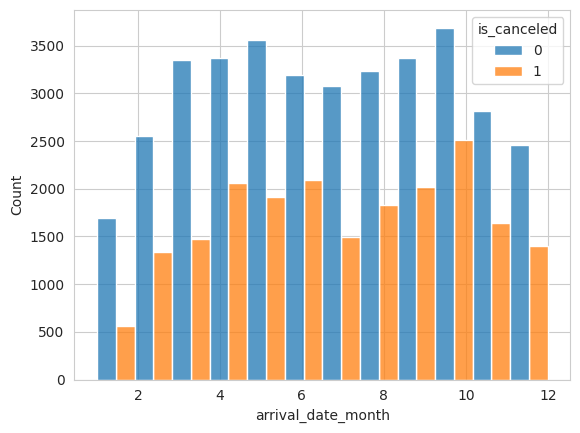

In [ ]:
#mese di arrivo e cancellazioni
sns.set_style("whitegrid")
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "dodge", data=train, bins = 12)
plt.show()

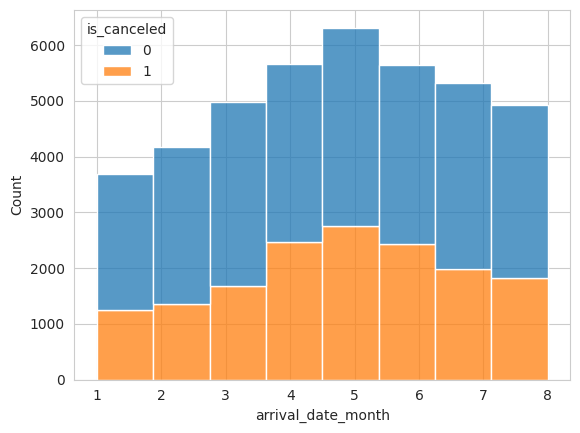

In [ ]:
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "stack", stat = "count", data=test, bins =8)
plt.show()

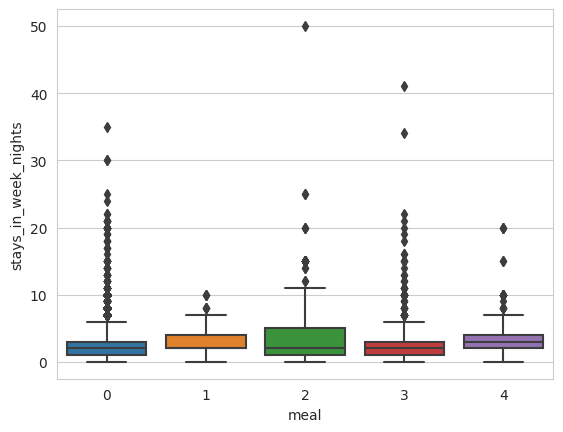

In [ ]:
#tipo di pasto in base ai
sns.boxplot(x="meal", y="stays_in_week_nights", data=train)
plt.show()

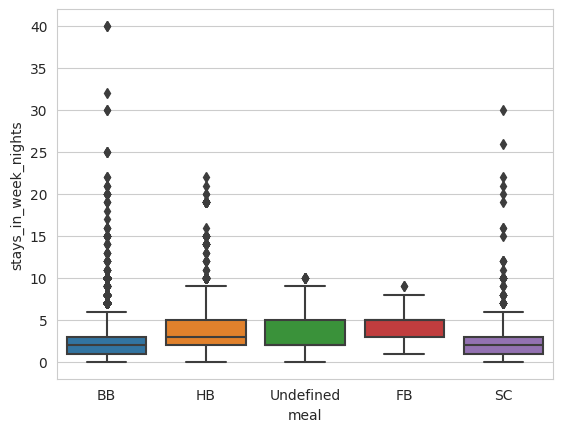

In [ ]:
sns.boxplot(x="meal", y="stays_in_week_nights", data=test_non)
plt.show()

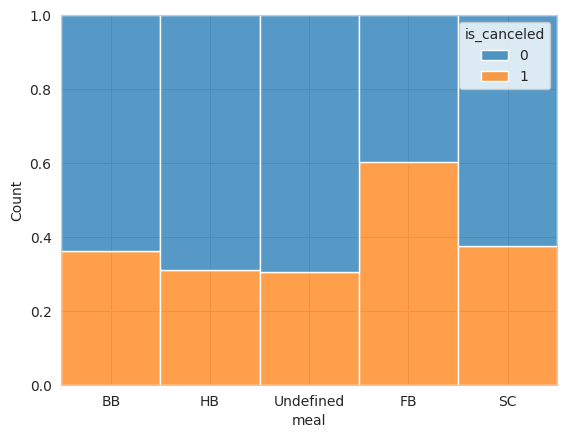

In [ ]:
#tipo di pasto e cancellazioni
sns.histplot(x="meal", hue = "is_canceled", multiple = "fill", stat = "count", data=train_non, bins =8)
plt.show()

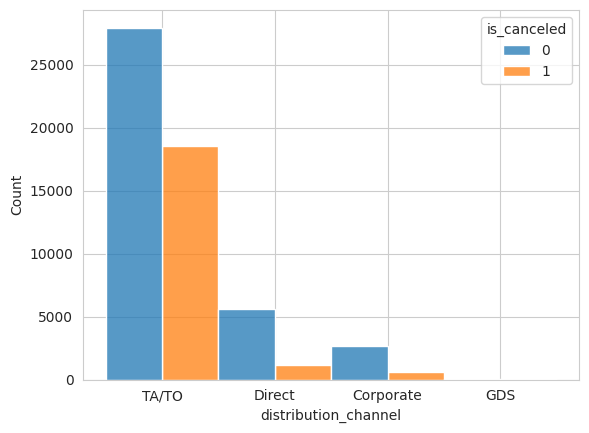

In [ ]:
#canale di distribuzione e cancellazioni
sns.histplot(x="distribution_channel", hue = "is_canceled", multiple = "dodge", stat = "count", data=train_non, bins =8)
plt.show()

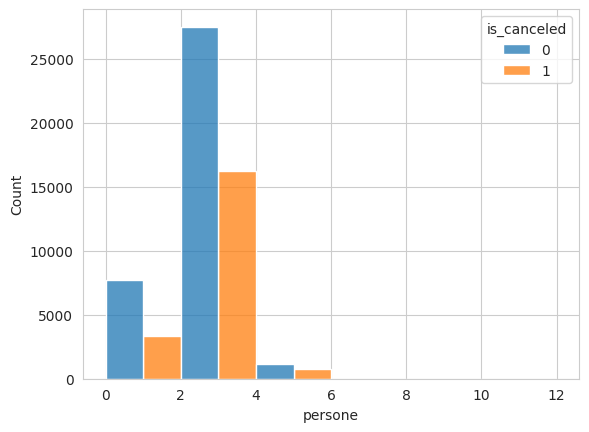

In [ ]:
#persone e cancellazioni
sns.histplot(x="persone", hue = "is_canceled", multiple = "dodge", stat = "count", data=train, bins = 6)
plt.show()

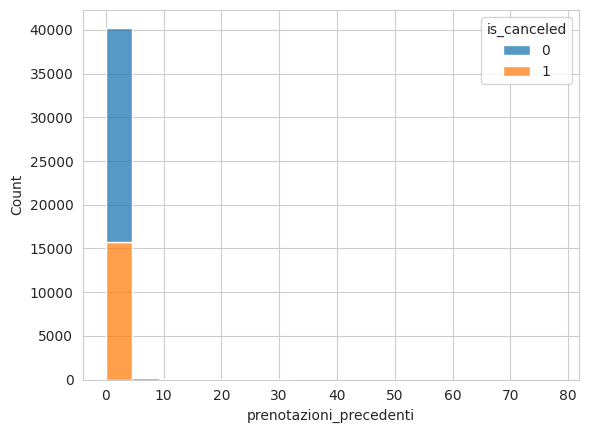

In [ ]:
#prenotazioni precedenti e cancellazioni
sns.histplot(x="prenotazioni_precedenti", hue = "is_canceled", multiple = "stack", stat = "count", data=test)
plt.show()

In [ ]:
#sns.swarmplot(x="is_repeated_guest", y="stays_in_week_nights", hue="is_canceled", size=2, data=train)
#plt.show()

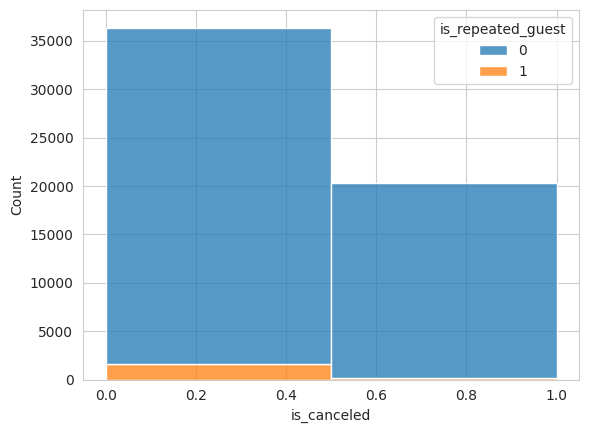

In [ ]:
sns.histplot(x="is_canceled", hue = "is_repeated_guest", multiple = "stack", stat = "count", data=train, bins = 2)
plt.show()